In [1]:
import nltk
import numpy as np
import pandas as pd
import sklearn

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
#nltk.download() fonksiyonu, NLTK'nın çalışması için gerekli olan veri kümelerini ve modelleri indirmek için kullanılır. 

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize

text = 'This is first sentence. Here comes second sentence, you sure? This one is last sentence.'

In [5]:
print(sent_tokenize(text))
print(word_tokenize(text))

['This is first sentence.', 'Here comes second sentence, you sure?', 'This one is last sentence.']
['This', 'is', 'first', 'sentence', '.', 'Here', 'comes', 'second', 'sentence', ',', 'you', 'sure', '?', 'This', 'one', 'is', 'last', 'sentence', '.']


In [6]:
from nltk.corpus import stopwords
print(set(stopwords.words('english')))

{'up', 'doing', 'should', "you're", 'her', 'above', 'hadn', 'than', 'so', 'ours', 'against', 'isn', 'had', 'she', 'does', "isn't", 'during', 'all', 'few', 'aren', 'has', 'shan', 'if', 'which', 'as', 'hers', 'what', 'why', 'don', 'no', 'of', "wouldn't", 'once', 'again', 'only', "mustn't", 'a', 'under', 'he', 'couldn', 'wasn', 'who', 'any', 'now', 'those', 't', 'by', "it's", 'the', 'when', 'ourselves', 'its', 'won', 'my', 'other', 'shouldn', 'yourself', 'an', 'are', 'very', 'am', 'at', 're', 've', 'on', 'for', "aren't", "couldn't", 'was', "won't", "she's", 'haven', 'you', 'have', 'ain', 'm', 'while', "weren't", 'do', 'themselves', 'his', 'not', 'about', 'that', 'been', 'him', "should've", "mightn't", 'it', 'did', 'this', 'having', 'own', 'didn', "doesn't", 'himself', 'y', 'they', 'or', 'here', 'them', 'after', 'until', "you'll", 'through', 'below', "shouldn't", 'how', 'some', 'to', 'being', 'nor', 'me', 'can', 'theirs', 'mightn', 'herself', 'these', 'off', "didn't", 'over', 'hasn', 'does

In [7]:
example = 'This is just an example to filter out stop words.'
stop_words =set(stopwords.words('english'))
word_tokens = word_tokenize(example)
filtered_words = [w for w in word_tokens if w not in stop_words]
print(word_tokens)
print(filtered_words)

['This', 'is', 'just', 'an', 'example', 'to', 'filter', 'out', 'stop', 'words', '.']
['This', 'example', 'filter', 'stop', 'words', '.']


In [8]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

example_words = ['coding', 'coder', 'code', 'codes']
done = [ps.stem(w) for w in example_words]
print(done)

['code', 'coder', 'code', 'code']


In [9]:
# Cümlenin tamamını kökten kesme

new_text = "When riders are riding their bikes, they often think of racers race on th racetrack with their super bikes."
words=word_tokenize(new_text)

print([ps.stem(w) for w in words])

['when', 'rider', 'are', 'ride', 'their', 'bike', ',', 'they', 'often', 'think', 'of', 'racer', 'race', 'on', 'th', 'racetrack', 'with', 'their', 'super', 'bike', '.']


In [10]:
from nltk.corpus import udhr
print(udhr.raw('English-Latin1'))

Universal Declaration of Human Rights
Preamble
Whereas recognition of the inherent dignity and of the equal and inalienable rights of all members of the human family is the foundation of freedom, justice and peace in the world, 

Whereas disregard and contempt for human rights have resulted in barbarous acts which have outraged the conscience of mankind, and the advent of a world in which human beings shall enjoy freedom of speech and belief and freedom from fear and want has been proclaimed as the highest aspiration of the common people, 

Whereas it is essential, if man is not to be compelled to have recourse, as a last resort, to rebellion against tyranny and oppression, that human rights should be protected by the rule of law, 

Whereas it is essential to promote the development of friendly relations between nations, 

Whereas the peoples of the United Nations have in the Charter reaffirmed their faith in fundamental human rights, in the dignity and worth of the human person and in

In [11]:
# Bazı örnek ve eğitim metinlerini içe aktaralım - George Bush'un 2005 ve 2006'daki sendikanın durumu konuşmaları

from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

In [12]:
# PunktSentenceTokenizer'ı eğitin

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

In [13]:
# Eğitimli tokenizer'ımızı kullanarak sample_text'i tokenize edin

tokenized = custom_sent_tokenizer.tokenize(sample_text)

In [14]:
# İşlev, simgeleştirilmiş her sözcüğü konuşmanın bir bölümüyle etiketler
def language_process():
    try:
        for i in tokenized[:5]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            print(tagged)
        
    except Exception as e:
        print(str(e))
        
language_process()

[('PRESIDENT', 'NNP'), ('GEORGE', 'NNP'), ('W.', 'NNP'), ('BUSH', 'NNP'), ("'S", 'POS'), ('ADDRESS', 'NNP'), ('BEFORE', 'IN'), ('A', 'NNP'), ('JOINT', 'NNP'), ('SESSION', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('CONGRESS', 'NNP'), ('ON', 'NNP'), ('THE', 'NNP'), ('STATE', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('UNION', 'NNP'), ('January', 'NNP'), ('31', 'CD'), (',', ','), ('2006', 'CD'), ('THE', 'NNP'), ('PRESIDENT', 'NNP'), (':', ':'), ('Thank', 'NNP'), ('you', 'PRP'), ('all', 'DT'), ('.', '.')]
[('Mr.', 'NNP'), ('Speaker', 'NNP'), (',', ','), ('Vice', 'NNP'), ('President', 'NNP'), ('Cheney', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('Congress', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('Supreme', 'NNP'), ('Court', 'NNP'), ('and', 'CC'), ('diplomatic', 'JJ'), ('corps', 'NN'), (',', ','), ('distinguished', 'JJ'), ('guests', 'NNS'), (',', ','), ('and', 'CC'), ('fellow', 'JJ'), ('citizens', 'NNS'), (':', ':'), ('Today', 'VB'), ('our', 'PRP$'), ('nat

In [15]:
import nltk
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\KaraogLaN_\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [16]:
train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

tokenized = custom_sent_tokenizer.tokenize(sample_text)

def language_process():
    try:
        for i in tokenized:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            
            # combine the part-of-speech tag with a regular expression
            
            chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)
            
            # draw the chunks with nltk
            #chunked.draw()     

    except Exception as e:
        print(str(e))

        
language_process()

In [17]:
def language_process():
    try:
        for i in tokenized:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            
            # combine the part-of-speech tag with a regular expression
            
            chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)
            
            # print(chunked)
            for subtree in chunked.subtrees(filter=lambda t: t.label() == 'Chunk'):
                print(subtree)
            
            # draw the chunks with nltk
            # chunked.draw()  
            
    except Exception as e:
        print(str(e))

        
language_process()

(Chunk PRESIDENT/NNP GEORGE/NNP W./NNP BUSH/NNP)
(Chunk ADDRESS/NNP)
(Chunk A/NNP JOINT/NNP SESSION/NNP)
(Chunk THE/NNP CONGRESS/NNP ON/NNP THE/NNP STATE/NNP)
(Chunk THE/NNP UNION/NNP January/NNP)
(Chunk THE/NNP PRESIDENT/NNP)
(Chunk Thank/NNP)
(Chunk Mr./NNP Speaker/NNP)
(Chunk Vice/NNP President/NNP Cheney/NNP)
(Chunk Congress/NNP)
(Chunk Supreme/NNP Court/NNP)
(Chunk called/VBD America/NNP)
(Chunk Coretta/NNP Scott/NNP King/NNP)
(Chunk Applause/NNP)
(Chunk President/NNP George/NNP W./NNP Bush/NNP)
(Chunk State/NNP)
(Chunk Union/NNP Address/NNP)
(Chunk Capitol/NNP)
(Chunk Tuesday/NNP)
(Chunk Jan/NNP)
(Chunk White/NNP House/NNP photo/NN)
(Chunk Eric/NNP DraperEvery/NNP time/NN)
(Chunk Capitol/NNP dome/NN)
(Chunk have/VBP served/VBN America/NNP)
(Chunk Tonight/NNP)
(Chunk Union/NNP)
(Chunk Applause/NNP)
(Chunk United/NNP)
(Chunk America/NNP)
(Chunk Applause/NNP)
(Chunk America/NNP)
(Chunk September/NNP)
(Chunk Dictatorships/NNP shelter/NN)
(Chunk Applause/NNP)
(Chunk Afghanistan/NNP)
(

In [18]:
def language_process():
    try:
        for i in tokenized:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            
            # combine the part-of-speech tag with a regular expression
            
            chunkGram = r"""Chunk: {<.*>+}
                                    }<VB.?|IN|DT|TO>+{"""
            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)
            
            # print(chunked)
            for subtree in chunked.subtrees(filter=lambda t: t.label() == 'Chunk'):
                print(subtree)
            
            # draw the chunks with nltk
            # chunked.draw()  
            
    except Exception as e:
        print(str(e))

        
language_process()

(Chunk PRESIDENT/NNP GEORGE/NNP W./NNP BUSH/NNP 'S/POS ADDRESS/NNP)
(Chunk A/NNP JOINT/NNP SESSION/NNP)
(Chunk THE/NNP CONGRESS/NNP ON/NNP THE/NNP STATE/NNP)
(Chunk
  THE/NNP
  UNION/NNP
  January/NNP
  31/CD
  ,/,
  2006/CD
  THE/NNP
  PRESIDENT/NNP
  :/:
  Thank/NNP
  you/PRP)
(Chunk ./.)
(Chunk
  Mr./NNP
  Speaker/NNP
  ,/,
  Vice/NNP
  President/NNP
  Cheney/NNP
  ,/,
  members/NNS)
(Chunk Congress/NNP ,/, members/NNS)
(Chunk
  Supreme/NNP
  Court/NNP
  and/CC
  diplomatic/JJ
  corps/NN
  ,/,
  distinguished/JJ
  guests/NNS
  ,/,
  and/CC
  fellow/JJ
  citizens/NNS
  :/:)
(Chunk our/PRP$ nation/NN)
(Chunk ,/, graceful/JJ ,/, courageous/JJ woman/NN who/WP)
(Chunk America/NNP)
(Chunk its/PRP$ founding/NN ideals/NNS and/CC)
(Chunk noble/JJ dream/NN ./.)
(Chunk Tonight/NN we/PRP)
(Chunk hope/NN)
(Chunk glad/JJ reunion/NN)
(Chunk husband/NN who/WP)
(Chunk so/RB long/RB ago/RB ,/, and/CC we/PRP)
(Chunk grateful/JJ)
(Chunk good/JJ life/NN)
(Chunk Coretta/NNP Scott/NNP King/NNP ./.)
(Chunk

In [19]:
def language_process():
    try:
        for i in tokenized[:5]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            namedEnt = nltk.ne_chunk(tagged, binary=True)
            namedEnt.draw()
            
    except Exception as e:
        print(str(e))

        
language_process()

In [20]:
def language_process():
    try:
        for i in tokenized[:5]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            namedEnt = nltk.ne_chunk(tagged, binary=False)
            namedEnt.draw()
            
    except Exception as e:
        print(str(e))

        
language_process()

In [21]:
import random
import nltk
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)),category)
            for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# shuffle the documents
random.shuffle(documents)

print('Number of Documents: {}'.format(len(documents)))
print('First Review: {}'.format(documents[1]))

all_words = []
for w in movie_reviews.words():
    all_words.append(w.lower())
    
all_words = nltk.FreqDist(all_words)

print('')
print('Most common words: {}'.format(all_words.most_common(15)))
print('The word happy: {}'.format(all_words["happy"]))

Number of Documents: 2000
First Review: (['as', 'fairy', 'tales', 'go', ',', 'cinderella', 'has', 'to', 'be', 'one', 'of', 'the', 'most', 'famous', '.', 'almost', 'everyone', 'knows', 'it', ',', 'well', 'at', 'least', 'in', 'north', 'america', '.', 'so', 'it', 'is', 'natural', 'that', 'someone', 'will', 'try', 'to', 'make', 'a', 'movie', 'out', 'of', 'it', '.', 'it', 'has', 'been', 'done', 'before', 'with', 'varying', 'results', '.', 'this', 'version', 'of', 'the', 'story', 'is', 'both', 'similar', 'to', 'the', 'original', 'and', 'different', 'at', 'the', 'same', 'time', '.', 'the', 'basic', 'story', 'remains', 'unchanged', 'but', ',', 'one', 'thing', 'that', 'seems', 'to', 'vanish', 'with', 'this', 'version', ',', 'and', 'that', 'is', 'all', 'the', 'fantastical', 'elements', 'of', 'the', 'story', '.', 'there', 'is', 'no', 'fairy', 'god', 'mother', 'or', 'anything', 'even', 'remotely', 'of', 'that', 'nature', '.', 'after', 'the', 'fantastical', 'elements', 'are', 'stripped', 'away', 'w

In [22]:
# We'll use the 4000 most common words as features
print(len(all_words))
word_features = list(all_words.keys())[:4000]
print(word_features[:10])

39768
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party']


In [23]:
# The find_features function will determine which of the 3000 word features are contained in the review
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    #print(features)
    return features


# Lets use an example from a negative review
features = find_features(movie_reviews.words('neg/cv000_29416.txt'))
for key, value in features.items():
    if value == True:
        print (key)

plot
:
two
teen
couples
go
to
a
church
party
,
drink
and
then
drive
.
they
get
into
an
accident
one
of
the
guys
dies
but
his
girlfriend
continues
see
him
in
her
life
has
nightmares
what
'
s
deal
?
watch
movie
"
sorta
find
out
critique
mind
-
fuck
for
generation
that
touches
on
very
cool
idea
presents
it
bad
package
which
is
makes
this
review
even
harder
write
since
i
generally
applaud
films
attempt
break
mold
mess
with
your
head
such
(
lost
highway
&
memento
)
there
are
good
ways
making
all
types
these
folks
just
didn
t
snag
correctly
seem
have
taken
pretty
neat
concept
executed
terribly
so
problems
well
its
main
problem
simply
too
jumbled
starts
off
normal
downshifts
fantasy
world
you
as
audience
member
no
going
dreams
characters
coming
back
from
dead
others
who
look
like
strange
apparitions
disappearances
looooot
chase
scenes
tons
weird
things
happen
most
not
explained
now
personally
don
trying
unravel
film
every
when
does
give
me
same
clue
over
again
kind
fed
up
after
while
biggest


In [24]:
# Now lets do it for all the documents
featuresets = [(find_features(rev), category) for (rev, category) in documents]

In [25]:
# Split the featuresets into training and testing datasets using sklearn
from sklearn import model_selection

# define a seed for reproducibility
seed = 1

# split the data into training and testing datasets
training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=seed)

print(len(training))
print(len(testing))
#print(training[:2])

1500
500


In [26]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import os

# 4 fiziksel çekirdeğiniz olduğunu varsayalım
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

# define scoring method
scoring = 'accuracy'

# Define models to train
models=[]

models.append(('Nearest Neighbors',SklearnClassifier(KNeighborsClassifier(n_neighbors = 2))))
models.append(('Decision Tree',SklearnClassifier(DecisionTreeClassifier(max_depth=5))))
models.append(('Random Forest',SklearnClassifier(RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1))))
models.append(('Neural Net',SklearnClassifier(MLPClassifier(alpha=1, max_iter=400, warm_start=True, verbose=0))))
models.append(('AdaBoost',SklearnClassifier(AdaBoostClassifier())))
models.append(('SVM Linear',SklearnClassifier(SVC(kernel = 'linear'))))
models.append(('SVM RBF',SklearnClassifier(SVC(kernel = 'rbf'))))
models.append(('SVM Sigmoid',SklearnClassifier(SVC(kernel = 'sigmoid'))))
models.append(('SVM Polynomial',SklearnClassifier(SVC(kernel = 'poly'))))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    model.train(training)
    # and test on the testing dataset!
    accuracy = nltk.classify.accuracy(model, testing)*100
    print("{}: {}".format(name,accuracy))

Nearest Neighbors: 53.6
Decision Tree: 60.4
Random Forest: 54.400000000000006
Neural Net: 82.0
AdaBoost: 78.0
SVM Linear: 79.80000000000001
SVM RBF: 83.8
SVM Sigmoid: 82.19999999999999
SVM Polynomial: 82.0


Nearest Neighbors Accuracy: 53.60%
Decision Tree Accuracy: 60.80%
Random Forest Accuracy: 57.60%
Neural Net Accuracy: 80.20%
AdaBoost Accuracy: 78.00%
SVM Linear Accuracy: 79.80%
SVM RBF Accuracy: 83.80%
SVM Sigmoid Accuracy: 82.20%
SVM Polynomial Accuracy: 82.00%


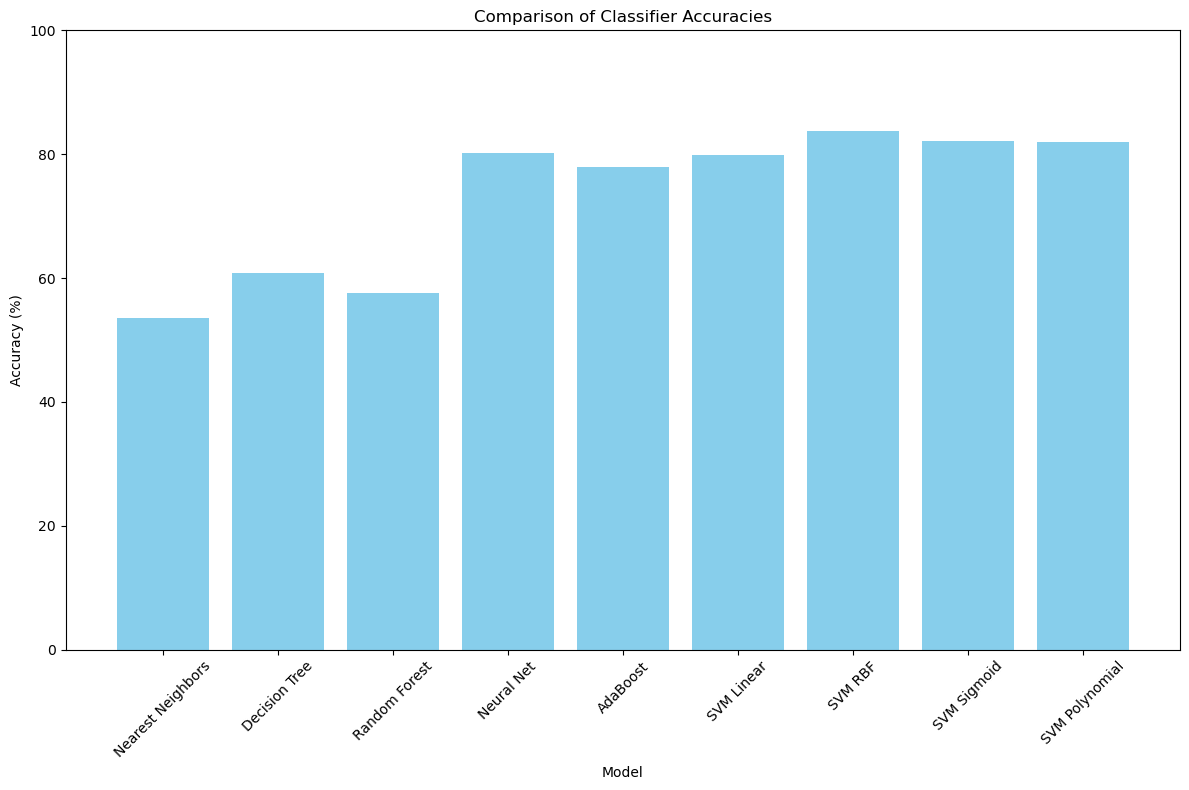

In [27]:
import matplotlib.pyplot as plt

# Sonuçları ve model isimlerini listeler olarak alın
model_names = [name for name, _ in models]
accuracies = []

# Her bir model için doğruluk değerlerini toplayın
for name, model in models:
    model.train(training)  # Modeli eğit
    accuracy = nltk.classify.accuracy(model, testing) * 100  # Doğruluğu hesapla
    accuracies.append(accuracy)  # Doğruluk listesine ekle
    print("{} Accuracy: {:.2f}%".format(name, accuracy))  # Sonucu yazdır

# Grafik oluşturma (sadece doğru şekilde doldurulmuşsa)
if accuracies:
    plt.figure(figsize=(12, 8))
    plt.bar(model_names, accuracies, color='skyblue')
    plt.xlabel('Model')
    plt.ylabel('Accuracy (%)')
    plt.title('Comparison of Classifier Accuracies')
    plt.ylim(0, 100)  # Y ekseni sınırlarını ayarlayın
    plt.xticks(rotation=45)  # X ekseni etiketlerini 45 derece döndürün
    plt.tight_layout()  # Grafik öğelerini sıkılaştırın

    # Grafik gösterme
    plt.show()
else:
    print("Accuracies list is empty. No data to plot.")


Nearest Neighbors Accuracy: 56.40%
Decision Tree Accuracy: 63.60%
Random Forest Accuracy: 52.40%
Neural Net Accuracy: 82.00%
AdaBoost Accuracy: 77.00%
SVM Linear Accuracy: 80.80%
SVM RBF Accuracy: 84.80%
SVM Sigmoid Accuracy: 85.00%
SVM Polynomial Accuracy: 81.40%


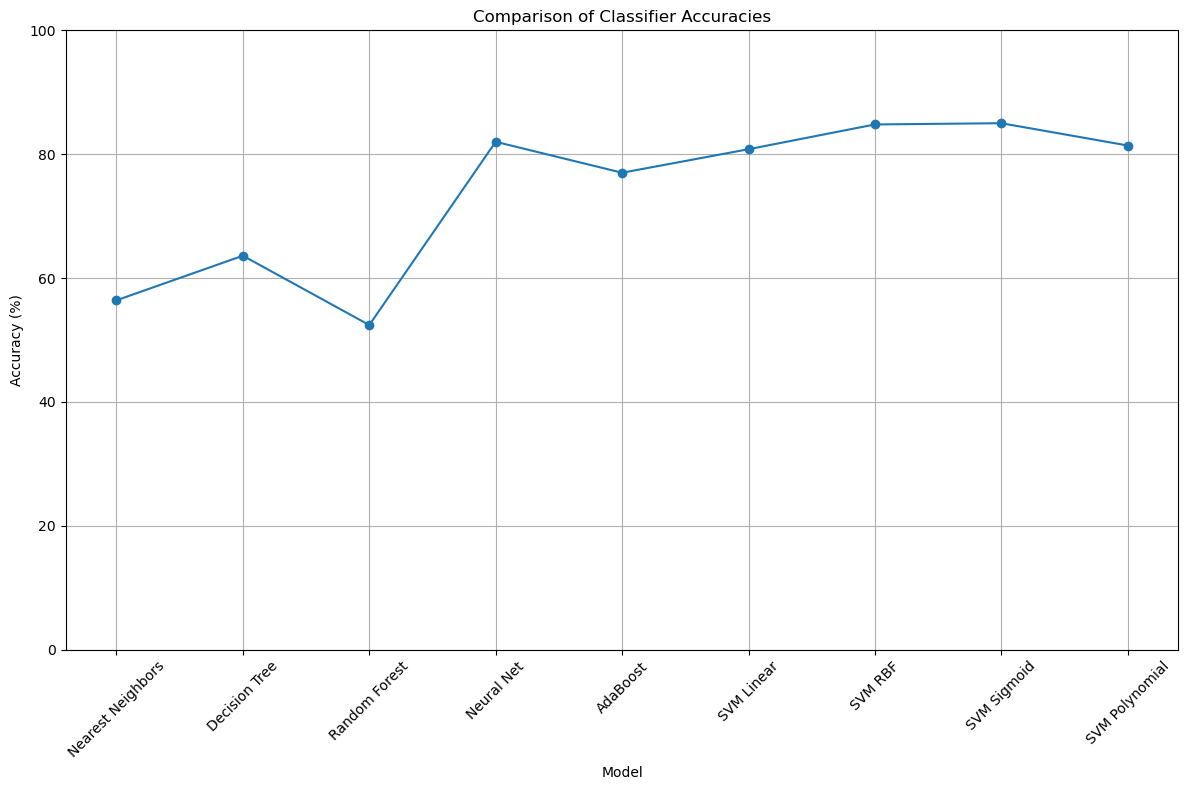

In [31]:
import matplotlib.pyplot as plt

# Sonuçları ve model isimlerini listeler olarak alın
model_names = [name for name, _ in models]
accuracies = []

# Her bir model için doğruluk değerlerini toplayın
for name, model in models:
    model.train(training)  # Modeli eğit
    accuracy = nltk.classify.accuracy(model, testing) * 100  # Doğruluğu hesapla
    accuracies.append(accuracy)  # Doğruluk listesine ekle
    print("{} Accuracy: {:.2f}%".format(name, accuracy))  # Sonucu yazdır

# Grafik oluşturma (sadece doğru şekilde doldurulmuşsa)
if accuracies:
    plt.figure(figsize=(12, 8))
    plt.plot(model_names, accuracies, marker='o')  # Çizgi grafik oluştur, nokta ile işaretle
    plt.xlabel('Model')
    plt.ylabel('Accuracy (%)')
    plt.title('Comparison of Classifier Accuracies')
    plt.ylim(0, 100)  # Y ekseni sınırlarını ayarlayın
    plt.xticks(rotation=45)  # X ekseni etiketlerini 45 derece döndürün
    plt.grid(True)  # Izgara çizgilerini göster
    plt.tight_layout()  # Grafik öğelerini sıkılaştırın

    # Grafik gösterme
    plt.show()
else:
    print("Accuracies list is empty. No data to plot.")
